In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("df_q_roe.csv")

In [29]:
df.drop(df.columns[1], axis=1, inplace=True)

In [30]:
dfval = df.fillna(-1).values
num_row = dfval.shape[0]
top_50s = []
bottom_50s = []
market_300 = []

for date in range(2, dfval.shape[1]):

    col = dfval[:, [0,date]]
    num_nan = np.sum(col[:,1] < 0)
    sorted_x = np.array(sorted(list(col), key=lambda x: -x[1]))
    
    top_50s.append(np.array(sorted_x[:100])[:,0])
    bottom_50s.append(np.array(sorted_x[num_row-num_nan-100:num_row-num_nan])[:,0])
    market_300.append(np.array(sorted_x[:330])[:,0])

In [31]:
dates = [x[:-7] + x[-4:] for x in df.columns.values[3:]]
tops = np.array(top_50s)
bottoms = np.array(bottom_50s)
markets = np.array(market_300)

In [32]:
tops[len(dates)]

array(['ABBV US  EQUITY', 'AZO US  EQUITY', 'BA US  EQUITY',
       'CL US  EQUITY', 'HD US  EQUITY', 'KMB US  EQUITY',
       'KLAC US  EQUITY', 'LB US  EQUITY', 'LMT US  EQUITY',
       'MAS US  EQUITY', 'MA US  EQUITY', 'MCO US  EQUITY',
       'ORLY US  EQUITY', 'PM US  EQUITY', 'SPGI US  EQUITY',
       'STX US  EQUITY', 'SEE US  EQUITY', 'SBUX US  EQUITY',
       'CLX US  EQUITY', 'HSY US  EQUITY', 'UPS US  EQUITY',
       'VRSN US  EQUITY', 'WYN US  EQUITY', 'YUM US  EQUITY',
       'PEP US  EQUITY', 'MTD US  EQUITY', 'MCD US  EQUITY',
       'ALLE US  EQUITY', 'CBS US  EQUITY', 'IDXX US  EQUITY',
       'NKTR US  EQUITY', 'CTXS US  EQUITY', 'INTU US  EQUITY',
       'SPG US  EQUITY', 'HLT US  EQUITY', 'HBI US  EQUITY',
       'SYY US  EQUITY', 'LOW US  EQUITY', 'ITW US  EQUITY',
       'VRTX US  EQUITY', 'TJX US  EQUITY', 'CELG US  EQUITY',
       'NVDA US  EQUITY', 'TXN US  EQUITY', 'ZTS US  EQUITY',
       'WYNN US  EQUITY', 'K US  EQUITY', 'FTV US  EQUITY',
       'FOXA US  

In [33]:
bottoms[len(dates)]

array(['WRK US  EQUITY', 'PRU US  EQUITY', 'MCHP US  EQUITY',
       'CB US  EQUITY', 'GLW US  EQUITY', 'NLSN US  EQUITY',
       'ABT US  EQUITY', 'PBCT US  EQUITY', 'WDC US  EQUITY',
       'LUK US  EQUITY', 'FLS US  EQUITY', 'FLR US  EQUITY',
       'UDR US  EQUITY', 'FLIR US  EQUITY', 'WMT US  EQUITY',
       'WLTW US  EQUITY', 'CRM US  EQUITY', 'GGP US  EQUITY',
       'XRX US  EQUITY', 'INFO US  EQUITY', 'DISCA US  EQUITY',
       'DISCK US  EQUITY', 'A US  EQUITY', 'SRE US  EQUITY',
       'AMG US  EQUITY', 'MGM US  EQUITY', 'EQR US  EQUITY',
       'MLM US  EQUITY', 'APC US  EQUITY', 'DUK US  EQUITY',
       'ESS US  EQUITY', 'INCY US  EQUITY', 'SLB US  EQUITY',
       'UNM US  EQUITY', 'ARE US  EQUITY', 'WELL US  EQUITY',
       'DPS US  EQUITY', 'CCI US  EQUITY', 'AIZ US  EQUITY',
       'EQIX US  EQUITY', 'JEC US  EQUITY', 'BDX US  EQUITY',
       'O US  EQUITY', 'KMI US  EQUITY', 'MDT US  EQUITY',
       'COO US  EQUITY', 'SLG US  EQUITY', 'DWDP US  EQUITY',
       'VTR US 

Post Financial Crisis: 2010 - 2018

In [34]:
df_pe = pd.read_csv('spy_pe.csv')

In [35]:
df_tot_return = pd.read_csv('spy_total_return_indx.csv')
mkt_cap = pd.read_csv('spy_market_cap_more.csv')
df_pb = pd.read_csv('mod_spy_pb.csv')

In [36]:
#df_tot_return = pd.read_csv('mod_total_return.csv')

In [37]:
new_dates = mkt_cap.columns.values
mkt_cap = mkt_cap.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pb = df_pb.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [38]:
df_tot_return = df_tot_return.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [39]:
df_pe = df_pe.rename(index=str, columns={x:x[:-7]+x[-4:] for x in new_dates})

In [40]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []
result_topPE = []
result_bottomPE = []

for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    


In [41]:
dates[len(dates) - 36]

'3/2010'

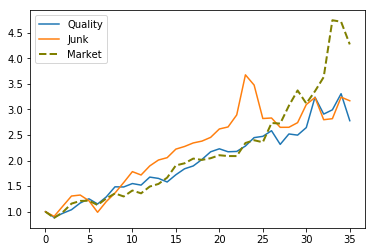

In [42]:
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 36, len(dates)):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator

plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [43]:
result_18 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})

In [44]:
result_18.to_csv('result_18_roe.csv')

In [45]:
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates)-36, len(dates)):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())

KeyError: "None of [['ACN US  EQUITY' 'AMD US  EQUITY' 'ALXN US  EQUITY' 'MO US  EQUITY'\n 'AZO US  EQUITY' 'HRB US  EQUITY' 'BA US  EQUITY' 'BMY US  EQUITY'\n 'CPB US  EQUITY' 'CL US  EQUITY' 'FCX US  EQUITY' 'IT US  EQUITY'\n 'GILD US  EQUITY' 'IBM US  EQUITY' 'K US  EQUITY' 'LLY US  EQUITY'\n 'LMT US  EQUITY' 'MA US  EQUITY' 'MCO US  EQUITY' 'PM US  EQUITY'\n 'HSY US  EQUITY' 'WU US  EQUITY' 'YUM US  EQUITY' 'VRSN US  EQUITY'\n 'BKNG US  EQUITY' 'SPGI US  EQUITY' 'WAT US  EQUITY' 'NFLX US  EQUITY'\n 'TJX US  EQUITY' 'MSFT US  EQUITY' 'PEP US  EQUITY' 'MNST US  EQUITY'\n 'KMB US  EQUITY' 'FTI US  EQUITY' 'COL US  EQUITY' 'CLX US  EQUITY'\n 'TPR US  EQUITY' 'ROST US  EQUITY' 'PAYX US  EQUITY' 'ESRX US  EQUITY'\n 'ADS US  EQUITY' 'PKG US  EQUITY' 'WRK US  EQUITY' 'MCD US  EQUITY'\n 'MRK US  EQUITY' 'CHRW US  EQUITY' 'BAX US  EQUITY' 'SHW US  EQUITY'\n 'AAPL US  EQUITY' 'SYY US  EQUITY' 'IPGP US  EQUITY' 'KO US  EQUITY'\n 'UPS US  EQUITY' 'IFF US  EQUITY' 'BLL US  EQUITY' 'CI US  EQUITY'\n 'GIS US  EQUITY' 'LH US  EQUITY' 'MTD US  EQUITY' 'ABT US  EQUITY'\n 'MMM US  EQUITY' 'VAR US  EQUITY' 'GRMN US  EQUITY' 'FLS US  EQUITY'\n 'PX US  EQUITY' 'WDC US  EQUITY' 'JNJ US  EQUITY' 'JWN US  EQUITY'\n 'IDXX US  EQUITY' 'ADP US  EQUITY' 'HAS US  EQUITY' 'MKC US  EQUITY'\n 'DRI US  EQUITY' 'BDX US  EQUITY' 'DLTR US  EQUITY' 'CF US  EQUITY'\n 'ECL US  EQUITY' 'JBHT US  EQUITY' 'SRCL US  EQUITY' 'CTSH US  EQUITY'\n 'FMC US  EQUITY' 'ORCL US  EQUITY' 'MAT US  EQUITY' 'FLR US  EQUITY'\n 'AMZN US  EQUITY' 'EW US  EQUITY' 'FLIR US  EQUITY' 'EL US  EQUITY'\n 'TDG US  EQUITY' 'AAP US  EQUITY' 'BBY US  EQUITY' 'GS US  EQUITY'\n 'WLTW US  EQUITY' 'DVA US  EQUITY' 'UTX US  EQUITY' 'GPS US  EQUITY'\n 'GD US  EQUITY' 'PGR US  EQUITY' 'AMGN US  EQUITY' 'VIAB US  EQUITY']] are in the [index]"

In [ ]:
plt.plot(result_topPB, label='Quality')
plt.plot(result_bottomPB, label='Junk')
plt.legend()

In [ ]:
for i in range(len(dates)-36, len(dates)):
    PE = df_pe.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPE.append((PE).sum())
    
for i in range(len(dates)-36, len(dates)):
    PE = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPE.append((PE).sum())

In [ ]:
plt.plot(result_topPE, label='Quality')
plt.plot(result_bottomPE, label='Junk')
plt.legend()

2003-2009

In [46]:
dates[len(dates) - 36]
dates[len(dates) - 64]

'3/2003'

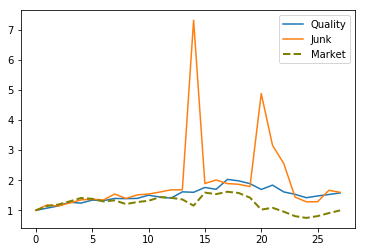

In [47]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_top.append((returns * percent / percent.sum()).sum())    

for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    result_market.append((returns * percent / percent.sum()).sum())
    
for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    
plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [48]:
result_09 = pd.DataFrame({'top':result_top[:],'market':result_market[:], 'bottom':result_bottom[:]})
result_09.to_csv('result_09_roe.csv')

In [21]:
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    result_topPB.append((PB * percent / percent.sum()).sum())
    
for i in range(len(dates) - 64, len(dates) - 36):
    PB = df_pb.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    result_bottomPB.append((PB * percent / percent.sum()).sum())
    
plt.plot(result_topPB, label='top')
plt.plot(result_bottomPB, label='bottom')
plt.legend()

KeyError: "None of [['ACN US  EQUITY' 'MO US  EQUITY' 'APH US  EQUITY' 'AZO US  EQUITY'\n 'HRB US  EQUITY' 'CPB US  EQUITY' 'CL US  EQUITY' 'EFX US  EQUITY'\n 'FCX US  EQUITY' 'K US  EQUITY' 'MRK US  EQUITY' 'ORCL US  EQUITY'\n 'PEP US  EQUITY' 'PFE US  EQUITY' 'PG US  EQUITY' 'TPR US  EQUITY'\n 'TJX US  EQUITY' 'VTR US  EQUITY' 'WDC US  EQUITY' 'YUM US  EQUITY'\n 'ZBH US  EQUITY' 'LLY US  EQUITY' 'ROST US  EQUITY' 'MKC US  EQUITY'\n 'KR US  EQUITY' 'MMM US  EQUITY' 'SYY US  EQUITY' 'UNH US  EQUITY'\n 'DVA US  EQUITY' 'HSY US  EQUITY' 'IFF US  EQUITY' 'BLL US  EQUITY'\n 'KMB US  EQUITY' 'PAYX US  EQUITY' 'CNC US  EQUITY' 'FLIR US  EQUITY'\n 'ADBE US  EQUITY' 'CTL US  EQUITY' 'HOG US  EQUITY' 'AJG US  EQUITY'\n 'CLX US  EQUITY' 'SPGI US  EQUITY' 'ABT US  EQUITY' 'LEN US  EQUITY'\n 'UPS US  EQUITY' 'EIX US  EQUITY' 'JNJ US  EQUITY' 'KO US  EQUITY'\n 'GRMN US  EQUITY' 'OMC US  EQUITY' 'WLTW US  EQUITY' 'CME US  EQUITY'\n 'SYK US  EQUITY' 'MMC US  EQUITY' 'AVY US  EQUITY' 'UTX US  EQUITY'\n 'CTSH US  EQUITY' 'TTWO US  EQUITY' 'CHRW US  EQUITY' 'EA US  EQUITY'\n 'BMY US  EQUITY' 'EXPD US  EQUITY' 'DHI US  EQUITY' 'GE US  EQUITY'\n 'BLK US  EQUITY' 'DG US  EQUITY' 'WAT US  EQUITY' 'STT US  EQUITY'\n 'BAX US  EQUITY' 'RMD US  EQUITY' 'ANSS US  EQUITY' 'PX US  EQUITY'\n 'TSS US  EQUITY' 'COF US  EQUITY' 'ADP US  EQUITY' 'BXP US  EQUITY'\n 'MTD US  EQUITY' 'AME US  EQUITY' 'COL US  EQUITY' 'ESRX US  EQUITY'\n 'DRI US  EQUITY' 'ECL US  EQUITY' 'VAR US  EQUITY' 'SRE US  EQUITY'\n 'CHD US  EQUITY' 'WMT US  EQUITY' 'FMC US  EQUITY' 'DGX US  EQUITY'\n 'KSS US  EQUITY' 'AXP US  EQUITY' 'DLTR US  EQUITY' 'XRAY US  EQUITY'\n 'TGT US  EQUITY' 'SWK US  EQUITY' 'UHS US  EQUITY' 'FITB US  EQUITY'\n 'BDX US  EQUITY' 'CAH US  EQUITY' 'MDT US  EQUITY' 'HD US  EQUITY']] are in the [index]"

2000 - 2002

In [22]:
dates[len(dates)-76]

'3/2000'

In [23]:
tops.shape

(94, 100)

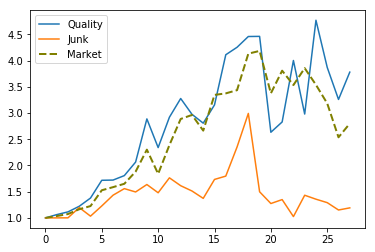

In [24]:
result_top = []
result_bottom = []
result_market = []
result_topPB = []
result_bottomPB = []

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[tops[i]][dates[i]]
    percent = percent.astype(float)
    result_top.append((returns * percent / percent.sum()).sum())

for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[bottoms[i]][dates[i]]
    percent = percent.astype(float)
    result_bottom.append((returns * percent / percent.sum()).sum())
    
for i in range(len(dates)-92, len(dates)-64):
    returns = df_tot_return.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = mkt_cap.rename(index=str, columns={'Unnd: 0':'stock'}).set_index('stock').loc[markets[i]][dates[i]]
    percent = percent.astype(float)
    result_market.append((returns * percent / percent.sum()).sum())

for i in range(len(result_top)):
    denominator = result_top[0]
    result_top[:] = result_top[:]/denominator
    
for i in range(len(result_market)):
    denominator = result_market[0]
    result_market[:] = result_market[:]/denominator
    
for i in range(len(result_bottom)):
    denominator = result_bottom[0]
    result_bottom[:] = result_bottom[:]/denominator
    

plt.plot(result_top, label='Quality')
plt.plot(result_bottom, label='Junk')
plt.plot(result_market, label='Market', marker = '', color = 'olive', linewidth=2, linestyle='dashed')
plt.legend()

In [25]:
result_00 = pd.DataFrame({'Quality':result_top[:],'Market':result_market[:], 'Junk':result_bottom[:]})
result_00.to_csv('result_00_roe.csv')